In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline
pd.set_option("display.max_columns",999)

In [2]:
# train = pd.read_pickle("train_outdel.pkl")
# test = pd.read_pickle("test_outdel.pkl")
df = pd.read_pickle("df_outdel.pkl")

# SalePrice가 없는 상태
# NA값이 없는 상태 NA값이 있는 경우 : 지워야 할 것들
df_FE_num_mean = pd.read_pickle("df_outdel_fillmean.pkl")
df_FE_num_medi = pd.read_pickle("df_outdel_fillmedi.pkl")
df_FE_cate = pd.read_pickle('df_FE(cate).pkl')

- 지울 category feature
['Alley',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [3]:
df_FE_num_mean.shape

(2896, 36)

In [4]:
df_FE_cate.shape

(2896, 43)

In [5]:
df.shape

(2896, 80)

In [6]:
df_FE_num_mean.index = df_FE_cate.index

In [7]:
temp = pd.merge(df_FE_num_mean,df_FE_cate, on='Id')

In [8]:
temp.shape

(2896, 79)

- numerical feature들을 category feature로 바꾸기
- numerical feature들과 category feature 같이 비교

일단 category column 부터 먼저 지운다

In [9]:
to_del = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

In [10]:
col = temp.columns.tolist()
for i in to_del:
    col.remove(i)

In [11]:
col

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish']

In [12]:
Lot = [x for x in col if "Lot" in x]
Bsmt = [x for x in col if "Bsmt" in x]
Garage = [x for x in col if "Garage" in x]
Porch = [x for x in col if "Porch" in x]
AbvGr = [x for x in col if "AbvGr" in x]

Bsmt

In [13]:
Bsmt
# TotalBsmtSF = BsmtFinSF1 + BsmtFinSF2 +BsmtUnfSF
# TotalBsmtSF 제외하고 나머지 3개 지우면 될듯
# BsmtFullBath, BsmtHalfBath : 둘 다 0 or 1로 바꾼다

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1']

In [14]:
to_del = to_del + ['BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF']

In [15]:
temp['BsmtFullBath'] = np.where(temp['BsmtFullBath'] != 0 , 1 , 0 ) 
temp['BsmtHalfBath'] = np.where(temp['BsmtHalfBath'] != 0 , 1 , 0 )
print(temp['BsmtFullBath'].unique())
print(temp['BsmtHalfBath'].unique())

[1 0]
[0 1]


Porch

In [16]:
Porch
# porch를 모두 더하여 Porchsum을 만들어서 사용한다

['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

In [17]:
porchSum = np.zeros(len(temp))
for i in Porch:
    porchSum += temp[i]

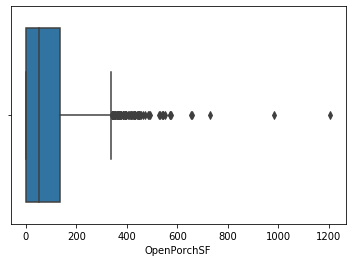

In [18]:
sns.boxplot(porchSum)

In [19]:
temp['Porchsum'] = temp['OpenPorchSF'] + temp['EnclosedPorch'] + temp['3SsnPorch'] + temp['ScreenPorch']
to_del = to_del + Porch

AbvGr

In [20]:
AbvGr
# 침실수 나머지방 주방
# KitchenAbvGr : 95% 1 -> 지우기
# BedroomAbvGr :  5 이상은 극소수
# TotRmsAbvGrd :  12까지 있는데 price와 선형성이 있을지는 의문 -> discrete화 하는게 좋을 것 같다
#              : (2,3,4),5,6,7,8,9,(10,11,12,13,14,15)

['BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd']

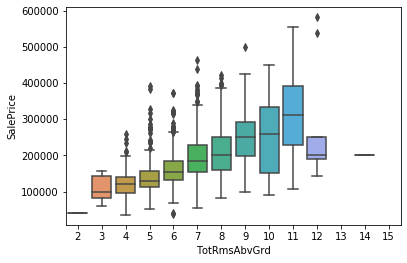

In [21]:
sns.boxplot(data=df, x='TotRmsAbvGrd', y='SalePrice')

In [22]:
temp['BedroomAbvGr'] = np.where(temp['BedroomAbvGr'] > 4, temp['BedroomAbvGr'], 5 )
temp['TotRmsAbvGrd'] = np.where(temp['TotRmsAbvGrd'] < 5, 4 , temp['TotRmsAbvGrd'] )
temp['TotRmsAbvGrd'] = np.where(temp['TotRmsAbvGrd'] > 9, 10 , temp['TotRmsAbvGrd'] )
to_del = to_del + ['KitchenAbvGr']

Garage

In [23]:
Garage
# 'GarageCars', 'GarageArea' :  GarageArea 이용

['GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageType', 'GarageFinish']

In [24]:
to_del = to_del + ['GarageCars']

In [25]:
# '1stFlrSF' : 1층 면적인듯
# '2ndFlrSF' : 0이 60%인데 아마 2층집이 아닌 경우 해당, 이를 통해 2층집인지 아닌지 feature 추가
# 'GrLivArea' = '1stFlrSF' + '2ndFlrSF' + 'LowQualFinSF
temp['2ndFlrSF'] = np.where(temp['2ndFlrSF'] == 1, 1, 0)
to_del = to_del + ['1stFlrSF', '2ndFlrSF', 'LowQualFinSF']

In [26]:
# Fireplaces :  test에만 4 존재 -> 3
temp['Fireplaces'] = np.where(temp['Fireplaces'] == 4 , 3, temp['Fireplaces'])

year

In [27]:
# 'YearBuilt'
# 'YearRemodAdd'
# 'GarageYrBlt'
# min 값을 빼서 scale 차이를 줄여주자
temp['YearBuilt'] = temp['YearBuilt'] - temp['YearBuilt'].min()
temp['YearRemodAdd'] = temp['YearRemodAdd'] - temp['YearRemodAdd'].min()
temp['GarageYrBlt'] = temp['GarageYrBlt'] - temp['GarageYrBlt'].min()

In [28]:
#'PoolArea','MiscVal'
to_del = to_del + ['PoolArea','MiscVal']

In [29]:
# MoSold, YrSold
to_del = to_del + ['YrSold', 'MoSold']

In [30]:
temp_ = temp.drop(to_del, axis='columns')

In [31]:
temp_.shape

(2896, 41)

In [32]:
temp_.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'CentralAir', 'KitchenQual', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'Porchsum'],
      dtype='object')

In [33]:
temp_.to_pickle('df_FE4.pkl')